<a href="https://colab.research.google.com/github/JisungPark0319/education/blob/main/lab_ml/ml06_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid 함수

In [3]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

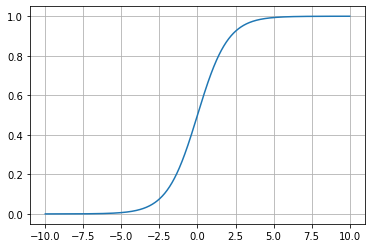

In [4]:
x = np.linspace(-10, 10, num=1_000) # -10 ~ 10 구간을 동일한 간격으로 1,000개로 나눔.
y = sigmoid(x)

plt.plot(x,y)
plt.grid()

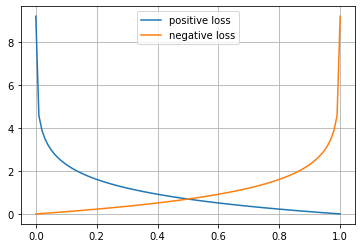

In [5]:
# log 함수 그래프
p = np.linspace(start=0.0001, stop=0.9999, num=100)
p_y = -np.log(p)
n_y = -np.log(1-p)

plt.plot(p, p_y, label='positive loss')
plt.plot(p, n_y, label='negative loss')
plt.legend()
plt.grid()

In [6]:
from sklearn.datasets import load_iris

In [7]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [22]:
X, y = iris['data'], iris['target']
X.shape, y.shape

((150, 4), (150,))

In [23]:
# 꽃잎 길이(petal length)로 품종이 virginica인지 아닌지를 분류
X = X[:, 2:3]
X[:5]

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4]])

In [24]:
y = (y == 2).astype(np.int16) # 품종이 virginica이면 1. 그렇지 않으면 0
y[:5], y[-5:]

(array([0, 0, 0, 0, 0], dtype=int16), array([1, 1, 1, 1, 1], dtype=int16))

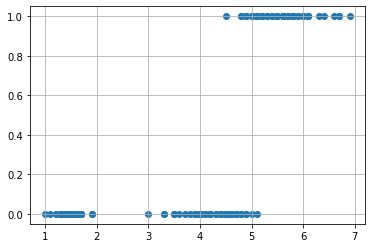

In [25]:
plt.scatter(X, y)
plt.grid()

In [27]:
from sklearn.linear_model import LogisticRegression

In [37]:
# 모델 생성
log_reg = LogisticRegression(random_state=1)

In [38]:
# 모델 훈련
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
intercept, coef = log_reg.intercept_, log_reg.coef_

In [40]:
sample1, sample2 = X[0], X[-1]
sample1, sample2

(array([1.4]), array([5.1]))

In [42]:
lin_eq1 = intercept + coef[0, 0] * sample1[0]
p = sigmoid(lin_eq1)
p

array([3.79053376e-06])

In [44]:
lin_eq2 = intercept + coef[0, 0] * sample2[0]
p = sigmoid(lin_eq2)
p

array([0.690877])

In [48]:
# 훈련이 끝난 모델에서 예측 확률을 계산
y_pred_prob = log_reg.predict_proba(X)
y_pred_prob[0], y_pred_prob[-1]

(array([9.99996209e-01, 3.79053376e-06]), array([0.309123, 0.690877]))

In [49]:
y_pred = log_reg.predict(X)

In [50]:
np.mean(y == y_pred)

0.9533333333333334

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [53]:
accuracy_score(y_true=y, y_pred=y_pred)

0.9533333333333334

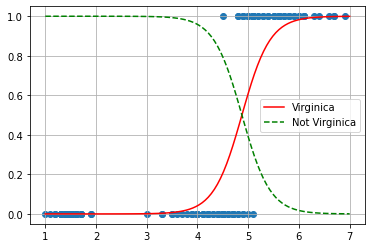

In [72]:
plt.scatter(X, y)
# 가상의 테스트 데이터
X_test = np.linspace(start=1, stop=7, num=100).reshape((100, 1))
y_test_pred = log_reg.predict_proba(X_test)
plt.plot(X_test, y_test_pred[:,1], 'r-', label='Virginica')
plt.plot(X_test, y_test_pred[:,0], 'g--', label='Not Virginica')
plt.legend()
plt.grid()